In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.io import loadmat
from scipy.optimize import minimize

In [21]:
# Load octave data
ex5data1 = loadmat('ex5/ex5data1.mat')
print(ex5data1.keys())
for key in ('X', 'y', 'Xval', 'yval', 'Xtest', 'ytest'):
    locals().setdefault(key, ex5data1[key])

dict_keys(['__header__', 'X', '__version__', 'Xval', 'ytest', '__globals__', 'y', 'Xtest', 'yval'])


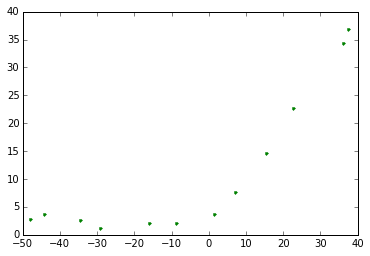

In [22]:
plt.plot(ex5data1['X'], ex5data1['y'], 'g.')

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


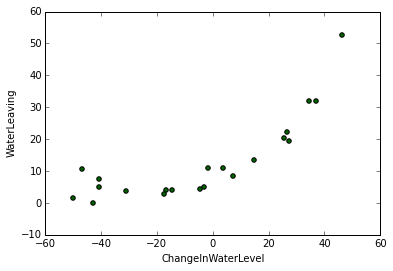

In [23]:
df = pd.DataFrame(Xval, columns=['ChangeInWaterLevel'])
df['WaterLeaving'] = yval
df.plot(kind='scatter', x='ChangeInWaterLevel', y='WaterLeaving',
       color='DarkGreen')

In [24]:
def predict(theta, X):
    if theta.ndim == 1:
        theta = np.array([theta]).T
#     X = np.c_[np.ones(len(X)), X]
    return X.dot(theta)

In [25]:
def linear_reg_cost_function(theta, X, y, _lambda=0.01, verbose=False):
    """Regularized linear regression cost function."""
    if theta.ndim == 1:
        theta = np.array([theta]).T
    if verbose:
        print("""Called with:
        theta [{theta.ndim}]: {theta}
        X: {X}
        y: {y}
        lambda: {lamb}
        """.format(X=X, y=y, theta=theta, lamb=_lambda))
    X = np.c_[np.ones(len(X)), X]
    m, n = X.shape
    
    # Cost Function
    h = predict(theta, X)
    err = (h - y)
    assert err.shape == (m, 1), err.shape
    sq_err = err**2
    assert sq_err.shape == err.shape, sq_err.shape
    J = (1/(2*m)) * np.sum(sq_err)
    assert J.shape == (), J
    J_reg = J + (_lambda/(2*m)) * (theta[1:].T.dot(theta[1:]))[0, 0]
    assert J_reg.shape == (), J_reg
    
    # Gradient
    grad = (1/m) * X.T.dot(err)
    assert grad.shape == (n, 1), grad.shape
    # Zero out bias weight before regularizing
    theta[:, 0] = 0 
    grad_reg = grad + (_lambda/m) * theta
    if verbose:
        print("""
            J: {}
            Gradient: {}
            """.format(J_reg, grad_reg.flatten()))
    return J_reg, grad_reg.flatten()

In [26]:
theta = np.ones((X.shape[1] + 1, 1))
assert theta.shape == (2, 1)
# Optimize theta
J, grad = linear_reg_cost_function(theta, X, y)
print("Cost:", J)
print("Gradient:", grad)

Cost: 303.95194222
Gradient: [ -15.30301567  598.16741084]


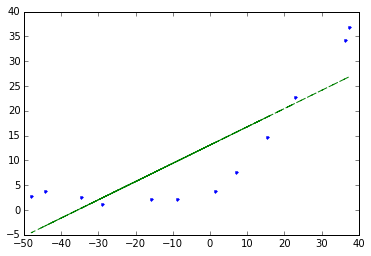

In [27]:
def train_linear_reg(X, y, _lambda, verbose=False):
    result = minimize(
                fun=linear_reg_cost_function,  # use our cost function to evaluate
                x0=np.zeros((X.shape[1] + 1, 1)),  # Initial guess for model parameters
                args=(X, y, _lambda),  # Passed into fun
                method='CG', # Conjugate Gradient
                jac=True,  # Our cost function also returns the gradient
                options={'maxiter': 200, 'disp': verbose}  # Same limit as Octave assignment
            )
    return result.x

biasX = np.c_[np.ones(len(X)), X]
theta = train_linear_reg(X, y, 1)
plt.plot(X, predict(theta, biasX), 'g--', X, y, 'b.')

In [28]:
def learning_curve(X, y, X_cv, y_cv, _lambda, step=1):
    """Generates a learning curve.
    
    A learning curve shows how error in the training and cross validation
    sets changes with respect to sample size. A "learned" function should 
    show low error in both sets, suggesting it will do well on unseen
    data, such as our test set. 
    
    High bias will manifest itself as an increase in training error 
    alongside an increase in sample size. This says our function is under-
    fitting the data. High variance will be seen by a very low training 
    error but high cross-validation error, as we have perfectly fit our
    training set but poorly predict the cross-validation data.
    
        for increasing sample sizes of training data, X_i, y_i
            determine optimal theta for X_i, y_i
            determine error(cost) for theta on X_i, y_i
            determine error for theta on hjkcross-validation data 
    """
    m = len(X)
    err_train, err_cv = np.zeros(m), np.zeros(m)
    for i in range(1, m, step):
        # Train our thetas
        X_i, y_i = X[:i], y[:i] 
        theta = train_linear_reg(X_i, y_i, _lambda, verbose=False)
        err_train[i], _ = linear_reg_cost_function(theta, X_i, y_i, _lambda=0.)
        err_cv[i], _ = linear_reg_cost_function(theta, X_cv, y_cv, _lambda=0.)
    return err_train, err_cv

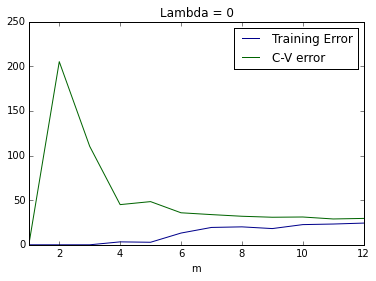

In [29]:
_lambda = 0
err_train, err_cv = learning_curve(X, y, Xval, yval, _lambda)
# print(len(err_train), len(X))
df_lamb0 = pd.DataFrame({
        'm': list(range(1,len(err_train)+1)), 
        'Train_err': err_train, 
        'CV_err': err_cv})
ax_train = df_lamb0.plot(x='m', y='Train_err', 
                         color='DarkBlue', label='Training Error', 
                         title='Lambda = {}'.format(_lambda))
df_lamb0.plot(x='m', y='CV_err', 
              color='DarkGreen', label='C-V error', ax=ax_train)

In [81]:
def poly_features(X, p):
    """Maps data into polynomial feature space.
    
    Adds additional features to the data set by raising the original 
    feature to powers of itself. This produces an (m, p) matrix, where
    m is the number of training samples and p is the final feature count.
    
    This falls under "feature engineering". 
    """
    m = len(X)
    if p == 0:
        return np.ones((m, 1))
if p == 1:jkkkkkkkkk
        return X
    return X * np.arange(1, p+1)

def test_poly_features():
    pass

In [65]:
def feature_normalize(X):
    """Normalize features around their mean."""
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    # Subtract mean of each feature
    normX = X - mu
    # Divide by std. dev of each feature
    normX = normX / sigma
    return normX, mu, sigma

In [68]:
def add_bias(X):
    return np.c_[np.ones(len(X)), X]

p = 8
X_poly = poly_features(X, p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = add_bias(X_poly)
X_poly_val = poly_features(Xval, p)
X_poly_val = (X_poly_val - X_poly_val.mean(axis=0))/X_poly_val.std(axis=0)
X_poly_val = add_bias(X_poly_val)

In [79]:
def validation_curve(X, y, Xval, yval, lambdas=None):
    """Generates a cross-validation curve.
    
    Calculates cross-validation error with respect to different values 
    for lambda. This allows for lambda to be automatically selected 
    by selecting for the minimum error.
    """
    if lambdas:
        lambda_vec = lambdas
    else:
        lambda_vec = np.linspace(0, 10)
    err_train, err_val = np.zeros((len(lambda_vec), 1)), \
        np.zeros((len(lambda_vec), 1))
    for i, l in enumerate(lambda_vec):
        # Optimize theta using lambda
        theta = train_linear_reg(X, y, l)
        # Find error with training set
        err_train[i], _ = linear_reg_cost_function(theta, X, y, .0
                                                  )
        # Find error with validation set
        err_val[i], _ = linear_reg_cost_function(theta, Xval, yval, .0)
    return lambda_vec, err_train, err_val

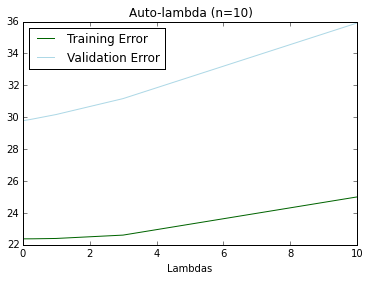

In [80]:
lambda_vec = [.0, .001, .003, .01, .03, .1, .3, 1, 3, 10]
lvec, err_train, err_val = validation_curve(X_poly, y, X_poly_val, yval,
                                           lambda_vec) 
lambda_df = pd.DataFrame({
        'Error_train': err_train.flatten(),
        'Error_val': err_val.flatten(),
        'Lambdas': lvec
    })
ax = lambda_df.plot(x='Lambdas', y='Error_train', 
                    color='DarkGreen', label='Training Error',
                   title='Auto-lambda (n={})'.format(len(lvec)))
lambda_df.plot(x='Lambdas', y='Error_val',
              color='LightBlue', label='Validation Error', ax=ax)
print("Minimum lambda: ")